# 데이터 분석 프로세스

- 초기화 및 파이썬 모듈 로딩
    - sklearn => 머신러닝
    - scipy => 수치 계산
    - pandas => 데이터 로딩, 수치 계산
    - numpy => 수치 계산
    - matplotlib => 시각화
- 데이터 수집
- 데이터 탐색 및 준비
    - 결측치, 이상치에 대한 처리
    - 추가 변수에 대한 처리
    - 훈련데이터와 테스트데이터로 분리
- 모델 훈련
    - 정형데이터분석(sklearn 기준, fit -> predict -> score)
        - 지도학습 ⇒ 타겟 변수가 존재
            - 분류
                - 의사결정나무 
                  - 분류, 회귀 둘다 사용 가능
                  - 이해쉽지만, 과대적합 가능성 크고, 경계면의 데이터 분류가 잘못될 수 있음
                - 앙상블(배깅,부스팅,랜덤포레스트)
                  - 랜덤포레스트 
                    - 성능 우수(결정트리 여러개 사용), 차원높고 희소한 데이터에는 잘 동작 안함
                  - 부스팅
                    - 랜포와 유사하게 성능 우수하나, 훈련 시간이 오래 걸림, 매개변수 튜닝이 중요
                  - 배깅
                - SVM(초평면, 커널함수)
                - k-NN
                - ANN
                - 로지스틱회귀
                - 나이브베이즈
            - 예측
                - 선형회귀
                    - 단순선형회귀
                    - 다중선형회귀
                    - 릿지 회귀(L2규제)
                    - 라쏘 회귀(L1규제)
                    - 엘라스틱넷 회귀(L1+L2)
                - 비선형회귀
                    - 다항회귀(polynomial regression)
        - 비지도학습 ⇒ 타겟 변수 미존재
            - 군집
                - 계층적군집(병합군집)
                - 비계층적군집(K평균)
                - 밀도기반군집(DBSCAN)
                - 혼합분포군집
            - 연관분석(장바구니분석)
    - 비정형데이터분석
        - 텍스트마이닝
- 모델 성능 평가
    - 분류
        - 정오분류표(혼동행렬) ⇒ accuracy가 1에 가까울수록 좋은 모델
        - ROC/AUC ⇒ AUC가 1에 가까울수록 좋은 모델
    - 예측 ⇒ MAE, RMSE, R2
- 모델 성능 개선

In [5]:
#install.packages("tidyverse")
#install.packages("rpart")
#install.packages("caret")
#install.packages("pROC")

# warning 메시지 무시
options(warn = -1)

library(tidyverse) # dplyr 등 이용 목적
library(caret) # 훈련,테스트 데이터 분류 목적
library(kknn) # knn 학습 목적
library(pROC) # ROC 확인 목적

#search()
#sessionInfo()

# 분석 전 불필요한 객체 삭제 처리
#rm(list = ls())

[1] "D:/srkwon/0.repo/analysis/data-analysis-2021/1.ADP실기/요약정리"

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other.credits


  0   1 
300 700 

credit.rating                account.balance 
                             0                              0 
        credit.duration.months previous.credit.payment.status 
                             0                              0 
                credit.purpose                  credit.amount 
                             0                              0 
                       savings            employment.duration 
                             0                              0 
              installment.rate                 marital.status 
                             0                              0 
                     guarantor             residence.duration 
                             0                              0 
                current.assets                            age 
                             0                              0 
                 other.credits                 apartment.type 
                             0                              0 
                  bank.credits                     occupation 
                             0                              0 
                    dependents                      telephone 
                             0                              0 
                foreign.worker 
                             0

[1] 800

[1] 200

[1] 28

[1] "best.parameters" "call"            "data"            "distance"       
 [5] "fitted.values"   "MEAN.ABS"        "MEAN.SQU"        "MISCLASS"       
 [9] "response"        "terms"

$kernel
[1] "rectangular"

$k
[1] 28

[1] 200


  0   1 
 21 179 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  15   6
         1  51 128
                                          
               Accuracy : 0.715           
                 95% CI : (0.6471, 0.7764)
    No Information Rate : 0.67            
    P-Value [Acc > NIR] : 0.09952         
                                          
                  Kappa : 0.2207          
                                          
 Mcnemar's Test P-Value : 5.611e-09       
                                          
            Sensitivity : 0.2273          
            Specificity : 0.9552          
         Pos Pred Value : 0.7143          
         Neg Pred Value : 0.7151          
             Prevalence : 0.3300          
         Detection Rate : 0.0750          
   Detection Prevalence : 0.1050          
      Balanced Accuracy : 0.5912          
                                          
       'Positive' Class : 0               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5912

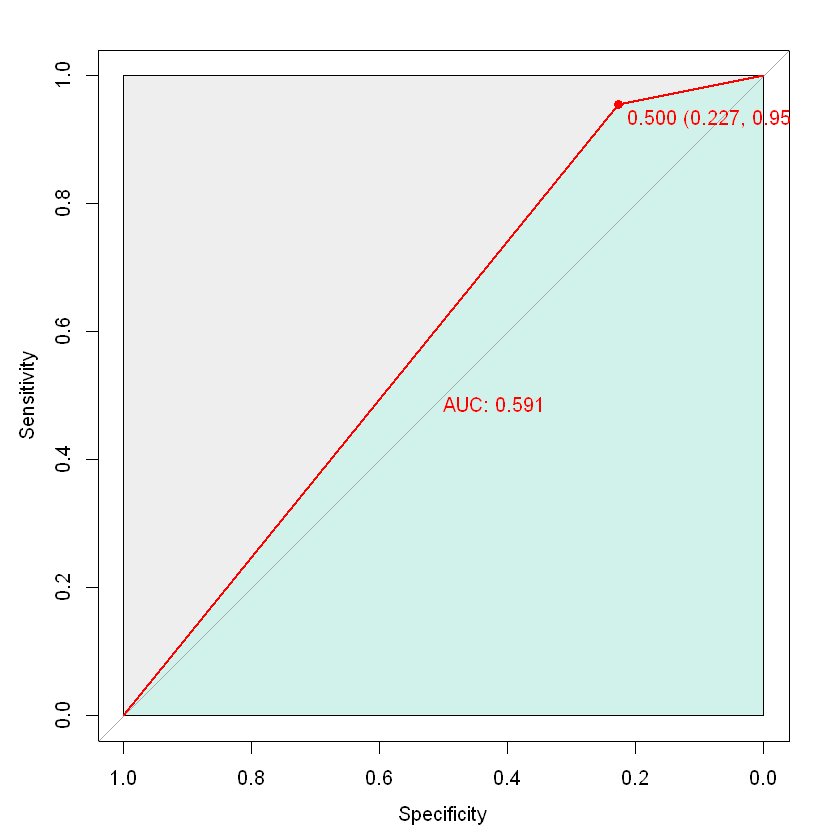

In [3]:
getwd()

# 데이터 수집
data = read.csv(file = "./data/credit_final.csv")

# 1000개의 관측값, 21개 변수
str(data)
table(data$credit.rating) # 불량 등급이 300, 우량 등급이 700
colSums(is.na(data))

# account.balance => 고객 계좌의 잔고
# credit.duration.months => 신용거래 지속 개월 수
# previous.credit.payment.status => 이전 신용 거래 지불 관련 상태

#summary(data)

#boxplot(data$credit.amount)

# NA 값을 갖는 레코드가 있는지 확인
#sum(!complete.cases(data))

# 만약 NA값이 존재하는 행이 있다면, 해당 레코드는 제외하고 모델 학습에 이용
#data.filtered <- data[complete.cases(data), ]

# credit.rating => 신용등급
# 0 -> 불량, 1 -> 우량

#barplot(
#  table(data$credit.rating)
#  , names.arg = c("불량", "우량")
#  , main = "신용등급(불량, 우량)"
#)

# 데이터 분할
# 훈련 데이터 및 테스트 데이터로 분할
set.seed(1000)
parts <- createDataPartition(y = data$credit.rating , p = 0.8)

# extract training, testsamples
data.train <- data[parts$Resample1, ]
data.test <- data[-parts$Resample1, ]

nrow(data.train);nrow(data.test);

# 모델 훈련
# train.kknn 함수로 최적 파라미터 값 발견 => kknn 함수에 최적 파라미터값을 인자로 넣어 훈련 및 예측
knn.m.param <- train.kknn(
  formula = as.factor(credit.rating) ~ . # 독립변수, 종속변수 설정
  , data = data.train # 대상 훈련 데이터
  , kmax = as.integer(sqrt(nrow(data.train))) # 확인 대상 최대 K값, 훈련 데이터의 양의 제곱근보다 작게 설정
  , distance = 2 # Minkowski distance(파라미터 2 => 유클리드 거리)
  , kernel = "rectangular" 
  # c("triangular", "rectangular", "epanechnikov", "optimal") # 커널 함수 => 거리값에 가중치를 주기 위해 적용되는 가중치 부여 함수
)

as.integer(sqrt(nrow(data.train))) # 28

ls(knn.m.param)
knn.m.param$best.parameters

# 최적 파라미터를 이용해서 knn 모델 훈련 및 예측값까지 생성
knn.m <- kknn(
  formula = as.factor(credit.rating) ~ . # 독립변수, 종속변수 설정
  , train = data.train
  , test = data.test
  , k = 28
  , distance = 2 # Minkowski distance(파라미터 2 => 유클리드 거리)
  , kernel = "rectangular" 
  # c("triangular", "rectangular", "epanechnikov", "optimal") # 커널 함수 => 거리값에 가중치를 주기 위해 적용되는 가중치 부여 함수
)

# 테스트 데이터 200건에 대한 분류값
length(knn.m$fitted.values)
table(knn.m$fitted.values)


# 모델 성능 평가
# 정오분류표를 통한 모델 성능 파악
confusionMatrix(knn.m$fitted.values, as.factor(data.test$credit.rating))

r <- roc(
  as.numeric(data.test$credit.rating)
  , ifelse(as.numeric(knn.m$fitted.values) == 2, 1, 0)
)

plot.roc(
  r,
  col="red"
  , print.auc=TRUE
  , max.auc.polygon = TRUE
  , print.thres=TRUE, print.thres.pch=19, print.thres.col = "red"
  , auc.polygon=TRUE, auc.polygon.col="#D1F2EB"
  )

auc(r)

# 모델 성능 개선